## Starter for Mutual Information Acquisition Function

In [1]:
import numpy as np
np.random.seed(123)

%matplotlib inline
import matplotlib.pyplot as plt

### Simple Function Example

For more details see Scikit-Optimize's Bayesian Optimization example [1].

[1] https://scikit-optimize.github.io/notebooks/bayesian-optimization.html

In [2]:
noise_level = 0.1

def f(x, noise_level=noise_level):
    return np.sin(5 * x[0]) * (1 - np.tanh(x[0] ** 2)) + np.random.randn() * noise_level

### Plot of the Unknown Function

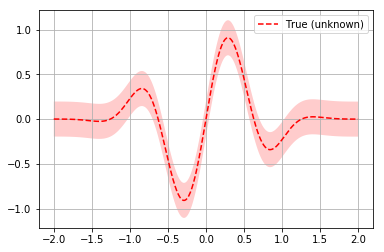

In [3]:
# Plot f(x) + contours
x = np.linspace(-2, 2, 400).reshape(-1, 1)
fx = [f(x_i, noise_level=0.0) for x_i in x]
plt.plot(x, fx, "r--", label="True (unknown)")
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate(([fx_i - 1.9600 * noise_level for fx_i in fx], 
                         [fx_i + 1.9600 * noise_level for fx_i in fx[::-1]])),
         alpha=.2, fc="r", ec="None")
plt.legend()
plt.grid()
plt.show()

### Gaussian Process with Expected Improvement

In [5]:
from skopt import gp_minimize

# Search bounds for both acquisition functions
dimensions = [(-2.0, 2.0)]

res_ei = gp_minimize(f,                        # the function to minimize
                     dimensions=dimensions,    # the bounds on each dimension of x
                     acq_func="EI",            # the acquisition function
                     n_calls=50,               # the number of evaluations of f 
                     n_random_starts=10,       # the number of random initialization points
                     #noise=0.1**2,            # the noise level (optional)
                     random_state=123,         # the random seed
                     verbose=True)         

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0011
Function value obtained: -0.1659
Current minimum: -0.1659
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0006
Function value obtained: 0.2878
Current minimum: -0.1659
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0004
Function value obtained: 0.0739
Current minimum: -0.1659
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0004
Function value obtained: 0.6885
Current minimum: -0.1659
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0005
Function value obtained: -0.3353
Current minimum: -0.3353
Iteration No: 6 started. Eva

Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 0.4089
Function value obtained: -0.6251
Current minimum: -1.1488
Iteration No: 42 started. Searching for the next optimal point.
Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 0.3846
Function value obtained: -0.9638
Current minimum: -1.1488
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 0.3603
Function value obtained: 0.0506
Current minimum: -1.1488
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 0.3043
Function value obtained: -0.8977
Current minimum: -1.1488
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 0.2803
Function value obtained: -0.6351
Current minimum: -1.1488
Iteration No: 46 sta

In [9]:
res_ei.fun

-1.1488183179015632

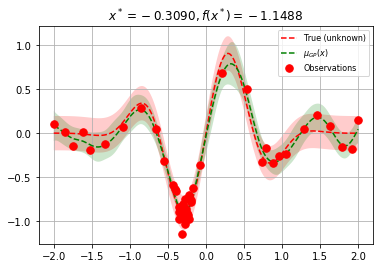

In [6]:
plt.rcParams["figure.figsize"] = (6, 4)

# Plot f(x) + contours
x = np.linspace(-2, 2, 400).reshape(-1, 1)
x_gp = res_ei.space.transform(x.tolist())

fx = [f(x_i, noise_level=0.0) for x_i in x]
plt.plot(x, fx, "r--", label="True (unknown)")
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate(([fx_i - 1.9600 * noise_level for fx_i in fx], 
                         [fx_i + 1.9600 * noise_level for fx_i in fx[::-1]])),
         alpha=.2, fc="r", ec="None")

# Plot GP(x) + contours
gp = res_ei.models[-1]
y_pred, sigma = gp.predict(x_gp, return_std=True)

plt.plot(x, y_pred, "g--", label=r"$\mu_{GP}(x)$")
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma, 
                         (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.2, fc="g", ec="None")

# Plot sampled points
plt.plot(res_ei.x_iters, 
         res_ei.func_vals, 
         "r.", markersize=15, label="Observations")

plt.title(r"$x^* = %.4f, f(x^*) = %.4f$" % (res_ei.x[0], res_ei.fun))
plt.legend(loc="best", prop={'size': 8}, numpoints=1)
plt.grid()

plt.show()

### Gaussian Process with Mutual Information

In [7]:
from skopt import gp_minimize

res = gp_minimize(f,                        # the function to minimize
                  dimensions=dimensions,    # the bounds on each dimension of x
                  acq_func="MI",            # the acquisition function
                  n_calls=50,               # the number of evaluations of f 
                  n_random_starts=10,       # the number of random initialization points
                  #noise=0.1**2,            # the noise level (optional)
                  random_state=123,         # the random seed
                  verbose=True)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0008
Function value obtained: -0.0427
Current minimum: -0.0427
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0004
Function value obtained: 0.3355
Current minimum: -0.0427
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0004
Function value obtained: 0.0796
Current minimum: -0.0427
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0005
Function value obtained: 0.6526
Current minimum: -0.0427
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0004
Function value obtained: -0.3294
Current minimum: -0.3294
Iteration No: 6 started. Eva

Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 0.3046
Function value obtained: -0.8931
Current minimum: -1.1035
Iteration No: 42 started. Searching for the next optimal point.
Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 0.3588
Function value obtained: -0.8388
Current minimum: -1.1035
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 0.4577
Function value obtained: -0.8411
Current minimum: -1.1035
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 0.5073
Function value obtained: -0.8796
Current minimum: -1.1035
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 0.4701
Function value obtained: -0.8569
Current minimum: -1.1035
Iteration No: 46 st

In [10]:
res.fun

-1.1035025720210736

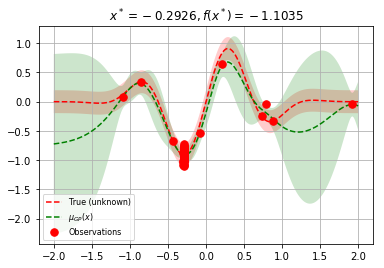

In [11]:
plt.rcParams["figure.figsize"] = (6, 4)

# Plot f(x) + contours
x = np.linspace(-2, 2, 400).reshape(-1, 1)
x_gp = res.space.transform(x.tolist())

fx = [f(x_i, noise_level=0.0) for x_i in x]
plt.plot(x, fx, "r--", label="True (unknown)")
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate(([fx_i - 1.9600 * noise_level for fx_i in fx], 
                         [fx_i + 1.9600 * noise_level for fx_i in fx[::-1]])),
         alpha=.2, fc="r", ec="None")

# Plot GP(x) + contours
gp = res.models[-1]
y_pred, sigma = gp.predict(x_gp, return_std=True)

plt.plot(x, y_pred, "g--", label=r"$\mu_{GP}(x)$")
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma, 
                         (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.2, fc="g", ec="None")

# Plot sampled points
plt.plot(res.x_iters, 
         res.func_vals, 
         "r.", markersize=15, label="Observations")

plt.title(r"$x^* = %.4f, f(x^*) = %.4f$" % (res.x[0], res.fun))
plt.legend(loc="best", prop={'size': 8}, numpoints=1)
plt.grid()

plt.show()

## Looking at the Hart6 Function

Let's see how things look with a slightly more complicated function.

### Gaussian Process with Expected Improvement

In [12]:
from skopt.benchmarks import hart6

dimensions = ((-5.0, 10.0), (0.0, 15.0))

hart_ei = gp_minimize(f,                        # the function to minimize
                      dimensions=dimensions,    # the bounds on each dimension of x
                      acq_func="EI",            # the acquisition function
                      n_calls=50,               # the number of evaluations of f 
                      n_random_starts=10,       # the number of random initialization points
                      #noise=0.1**2,            # the noise level (optional)
                      random_state=123,         # the random seed
                      verbose=True)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0014
Function value obtained: 0.0412
Current minimum: 0.0412
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0007
Function value obtained: -0.0542
Current minimum: -0.0542
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0007
Function value obtained: -0.0774
Current minimum: -0.0774
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0007
Function value obtained: -0.0374
Current minimum: -0.0774
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0007
Function value obtained: -0.0348
Current minimum: -0.0774
Iteration No: 6 started. Ev

Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 0.4061
Function value obtained: 0.1417
Current minimum: -0.3777
Iteration No: 42 started. Searching for the next optimal point.
Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 0.4962
Function value obtained: -0.0472
Current minimum: -0.3777
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 0.4239
Function value obtained: -0.1491
Current minimum: -0.3777
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 0.4794
Function value obtained: -0.0117
Current minimum: -0.3777
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 0.5207
Function value obtained: -0.0795
Current minimum: -0.3777
Iteration No: 46 sta

In [13]:
hart_ei.fun

-0.97447006182615759

### Gaussian Process with Mutual Information

In [15]:
hart_mi = gp_minimize(f,                        # the function to minimize
                      dimensions=dimensions,    # the bounds on each dimension of x
                      acq_func="MI",            # the acquisition function
                      n_calls=50,               # the number of evaluations of f 
                      n_random_starts=10,       # the number of random initialization points
                      #noise=0.1**2,            # the noise level (optional)
                      random_state=123,         # the random seed
                      verbose=True)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0007
Function value obtained: -0.0086
Current minimum: -0.0086
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0004
Function value obtained: 0.0045
Current minimum: -0.0086
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0005
Function value obtained: -0.0406
Current minimum: -0.0406
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0005
Function value obtained: -0.1900
Current minimum: -0.1900
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0004
Function value obtained: -0.0977
Current minimum: -0.1900
Iteration No: 6 started. E

Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 0.3892
Function value obtained: -0.1937
Current minimum: -0.5200
Iteration No: 42 started. Searching for the next optimal point.
Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 0.5779
Function value obtained: -0.3281
Current minimum: -0.5200
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 0.4159
Function value obtained: -0.2913
Current minimum: -0.5200
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 0.5418
Function value obtained: -0.2228
Current minimum: -0.5200
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 0.3675
Function value obtained: -0.1196
Current minimum: -0.5200
Iteration No: 46 st

In [16]:
hart_mi.fun

-0.51997221025210028